In [198]:
from keras.layers import Embedding,Dense,LSTM,Dropout
import pandas as pd
from keras.preprocessing.text import one_hot,hashing_trick,Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [199]:
df = pd.read_csv("train_set.csv",delimiter=",",encoding='latin-1')
data = df.as_matrix()
num_class = 12

In [200]:
X = data[:,1]

In [201]:
Y = data[:,0]

In [202]:
tokenizer = Tokenizer()

In [203]:
tokenizer.fit_on_texts(X)

In [204]:
X = tokenizer.texts_to_sequences(X)

In [205]:
X = pad_sequences(X,padding='post')

In [206]:
print(tokenizer.num_words)

None


In [207]:
label = LabelEncoder()
Y = label.fit_transform(Y)
Y = to_categorical(Y)

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.0)

In [210]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((23615, 21), (0, 21), (23615, 12), (0, 12))

In [211]:
#####Preprocessing Work Completed###############

In [212]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [213]:
model = Sequential()

In [214]:
model.add(Embedding(len(tokenizer.word_index)+1,100,input_length=X.shape[1]))

In [215]:
model.add(LSTM(64))
model.add(Dropout(0.2))

In [216]:
model.add(Dense(num_class,activation='softmax'))

In [217]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [218]:
model.fit(X_train,Y_train,batch_size=24,epochs=20,validation_split=0.2)

Train on 18892 samples, validate on 4723 samples
Epoch 1/20
18892/18892 [==============================] - 37s 2ms/step - loss: 0.9555 - acc: 0.6829 - val_loss: 0.4727 - val_acc: 0.8636
Epoch 2/20
18892/18892 [==============================] - 39s 2ms/step - loss: 0.3194 - acc: 0.9092 - val_loss: 0.3311 - val_acc: 0.9015
Epoch 3/20
18892/18892 [==============================] - 40s 2ms/step - loss: 0.1743 - acc: 0.9539 - val_loss: 0.3278 - val_acc: 0.909243 - acc: 0.953
Epoch 4/20
18892/18892 [==============================] - 40s 2ms/step - loss: 0.1148 - acc: 0.9693 - val_loss: 0.3079 - val_acc: 0.9176
Epoch 5/20
18892/18892 [==============================] - 39s 2ms/step - loss: 0.0807 - acc: 0.9799 - val_loss: 0.3244 - val_acc: 0.9193
Epoch 6/20
18892/18892 [==============================] - 36s 2ms/step - loss: 0.0647 - acc: 0.9828 - val_loss: 0.3431 - val_acc: 0.9191
Epoch 7/20
18892/18892 [==============================] - 35s 2ms/step - loss: 0.0481 - acc: 0.9878 - val_loss: 0.

In [220]:
history = _

In [226]:
import matplotlib.pyplot as plt

In [227]:
plt.plot(history.history['acc'])

In [228]:
plt.plot(history.history['val_acc'])

In [229]:
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='lower right')

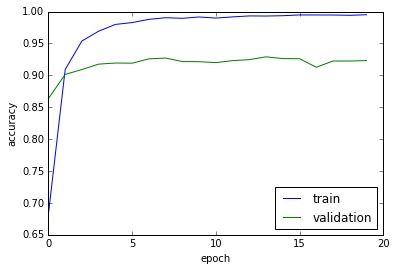

In [230]:
plt.show()

4723/4723 [==============================] - 1s 198us/step


[0.44975030444611336, 0.9176370951550354]